In [ ]:
# default_exp core

# Some Cairo Basics

> I plan on starting with some arty stuff

In [ ]:
from days_of_code.core import *

This should be a chance to try out a drawing library and, importantly, figure out managing dependancies and such before Monday. I tried `sudo apt install libcairo2-dev pkg-config` but `pip install pycairo` still failed :/ Instead I did `pip install cairocffi` so I guess that's what I'm using. I added it to the requirements list in settings.ini.

In [ ]:
#export
#show
import cairocffi as cairo
from IPython.display import Image, display

def hw_cairo(text):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 300, 200)
    context = cairo.Context(surface)
    with context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
    # Restore the default source which is black.
    context.move_to(90, 140)
    context.rotate(-0.5)
    context.set_font_size(20)
    context.show_text(text)
    surface.write_to_png('example.png')
    display(Image('example.png'))

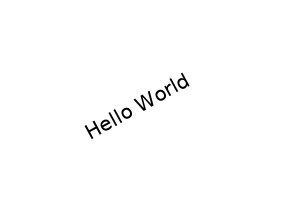

In [ ]:
#skiptest
hw_cairo('Hello World')

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_Cairo_Hello.ipynb.
Converted index.ipynb.
